# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_path = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

query = f"{url+city}&units=imperial&appid={weather_api_key}"

lat=[]
lon=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]
citiesit=[]

for city in cities:
    
    query = f"{url+city}&units=imperial&appid={weather_api_key}"
    
    print(f"Processing Record | {city}")
    
    response=requests.get(query).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        citiesit.append(response["name"])
        
    except(KeyError):
        print("City not found, Skipping...")
        pass
    
print("-----------------")
print("Data Complete")
print("-----------------")


Processing Record | goure
Processing Record | kurchum
Processing Record | hermanus
Processing Record | kavieng
Processing Record | bacungan
Processing Record | ushuaia
Processing Record | taolanaro
City not found, Skipping...
Processing Record | rikitea
Processing Record | vaini
Processing Record | tocopilla
Processing Record | mataura
Processing Record | pevek
Processing Record | tarakan
Processing Record | plettenberg bay
Processing Record | zatoka
Processing Record | hilo
Processing Record | yellowknife
Processing Record | birjand
Processing Record | kijang
Processing Record | bethel
Processing Record | talah
City not found, Skipping...
Processing Record | grand river south east
City not found, Skipping...
Processing Record | bilibino
Processing Record | xuddur
Processing Record | fort nelson
Processing Record | vangaindrano
Processing Record | biloela
Processing Record | tufanganj
Processing Record | nikolskoye
Processing Record | byron bay
Processing Record | chilmari
Processing R

Processing Record | saint-augustin
Processing Record | namibe
Processing Record | aden
Processing Record | omagari
Processing Record | narsaq
Processing Record | barentsburg
City not found, Skipping...
Processing Record | nampula
Processing Record | pangai
Processing Record | bambous virieux
Processing Record | kalmunai
Processing Record | te anau
Processing Record | cabo san lucas
Processing Record | nueva italia
Processing Record | anadyr
Processing Record | victor harbor
Processing Record | teahupoo
Processing Record | magiresti
Processing Record | guerrero negro
Processing Record | avenal
Processing Record | yar-sale
Processing Record | gladstone
Processing Record | broome
Processing Record | the hague
Processing Record | bushehr
Processing Record | tarudant
City not found, Skipping...
Processing Record | syamzha
Processing Record | kovvur
Processing Record | zhanaozen
Processing Record | seoul
Processing Record | bennettsville
Processing Record | tsihombe
City not found, Skipping.

Processing Record | plouzane
Processing Record | sabirabad
Processing Record | merauke
Processing Record | canta
Processing Record | monte alegre
Processing Record | benjamin aceval
Processing Record | petauke
Processing Record | leningradskiy
Processing Record | varenikovskaya
Processing Record | lappeenranta
Processing Record | santa maria
Processing Record | galveston
Processing Record | yakeshi
Processing Record | bay roberts
Processing Record | yakovlevka
Processing Record | we
City not found, Skipping...
Processing Record | mrakovo
Processing Record | clarence town
Processing Record | san pedro
Processing Record | kiunga
Processing Record | nizip
Processing Record | pingxiang
Processing Record | isangel
Processing Record | sioux city
Processing Record | henties bay
Processing Record | komsomolskiy
Processing Record | pisco
Processing Record | imaculada
Processing Record | rungata
City not found, Skipping...
Processing Record | chumikan
Processing Record | kattivakkam
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
series = [citiesit, lat, lon, max_temp, humidity, clouds, wind, country, date]

dict = {"City":citiesit, "Lat":lat, "Lng":lon, "Max Temp":max_temp, "Humidity":humidity, 
        "Cloudiness":clouds, "Wind Speed":wind, "Country":country, "Date":date}

city_data = pd.DataFrame(dict)


city_data.to_csv(output_path, index=False)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gouré,13.9835,10.2704,80.62,8,42,8.12,NE,1618713612
1,Kurchum,48.5722,83.6542,51.91,54,8,6.78,KZ,1618713613
2,Hermanus,-34.4187,19.2345,71.01,24,0,1.99,ZA,1618713613
3,Kavieng,-2.5744,150.7967,83.55,73,55,9.98,PG,1618713596
4,Bacungan,9.9106,118.7022,84.20,74,90,9.22,PH,1618713614


In [9]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.267246,19.423648,59.430708,68.053541,52.195164,7.531779,1.618714e+09
std,32.002057,88.848674,20.821534,22.093202,39.512710,5.199900,1.011893e+02
min,-54.800000,-179.166700,-6.030000,6.000000,0.000000,0.090000,1.618713e+09
25%,-3.775600,-58.467900,43.630000,54.500000,8.000000,3.650000,1.618714e+09
50%,25.208800,27.911600,63.180000,72.000000,58.000000,6.220000,1.618714e+09
75%,47.633250,85.373450,76.990000,86.000000,90.000000,10.175000,1.618714e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,31.250000,1.618714e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
indexnames = city_data[city_data["Humidity"]>100].index
indexnames

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_data.drop(indexnames)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gouré,13.9835,10.2704,80.62,8,42,8.12,NE,1618713612
1,Kurchum,48.5722,83.6542,51.91,54,8,6.78,KZ,1618713613
2,Hermanus,-34.4187,19.2345,71.01,24,0,1.99,ZA,1618713613
3,Kavieng,-2.5744,150.7967,83.55,73,55,9.98,PG,1618713596
4,Bacungan,9.9106,118.7022,84.20,74,90,9.22,PH,1618713614
...,...,...,...,...,...,...,...,...,...
574,Kandiari,26.9156,68.5216,89.33,26,3,8.14,PK,1618713857
575,Mitú,1.1983,-70.1733,71.87,95,100,1.72,CO,1618713858
576,Shalya,57.2471,58.7298,37.26,80,8,8.46,RU,1618713859
577,Huilong,31.8111,121.6550,64.40,37,57,3.71,CN,1618713815


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

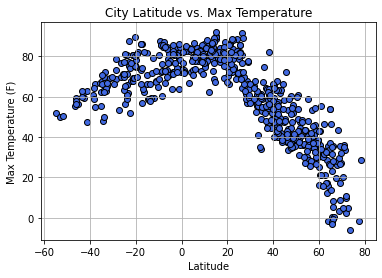

In [15]:
plt.scatter(lat, max_temp, marker='o', color='royalblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show
plt.savefig("../output_data/Temp Plot.png")

#The temperature is higher as we get close to the equator(Latitude=0)

## Latitude vs. Humidity Plot

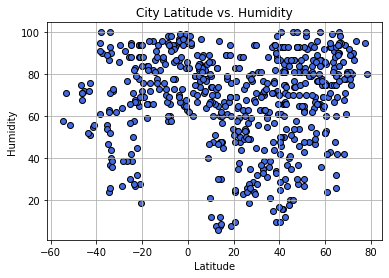

In [16]:
plt.scatter(lat, humidity, marker='o', color='royalblue', edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show
plt.savefig("../output_data/Humidity Plot.png")

#The humidity values tend to be higher closer to the equator 

## Latitude vs. Cloudiness Plot

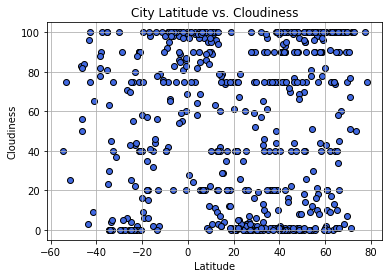

In [17]:
plt.scatter(lat, clouds, marker='o', color='royalblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show
plt.savefig("../output_data/Cloudiness Plot.png")

#There doesn't seem to be much of a trend as far as cloudiness and latitude

## Latitude vs. Wind Speed Plot

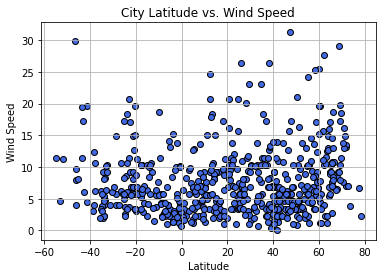

In [18]:
plt.scatter(lat, wind, marker='o', color='royalblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show
plt.savefig("../output_data/Wind SpeedPlot.png")

#Same as Cloudiness, wind speed seems pretty uniform

## Linear Regression

In [21]:
indexnamesn = clean_city_data[clean_city_data["Lat"]>=0].index
indexnamess = clean_city_data[clean_city_data["Lat"]<0].index

n_hem = pd.DataFrame(clean_city_data)
n_hem = n_hem.drop(indexnamess) 
s_hem = pd.DataFrame(clean_city_data)
s_hem = s_hem.drop(indexnamesn)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7975191494349042


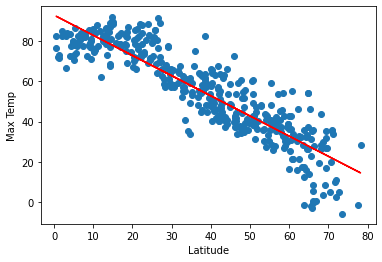

<Figure size 432x288 with 0 Axes>

In [22]:
x = n_hem['Lat']
y = n_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

#In the Northern Hemisphere there is a negative correlation between Temperature and Latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3567348083961786


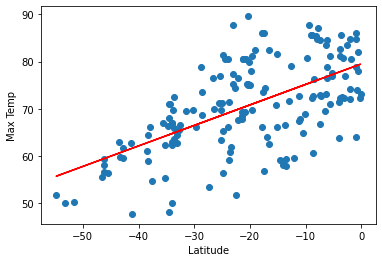

<Figure size 432x288 with 0 Axes>

In [23]:
x = s_hem['Lat']
y = s_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

#In the Southern Hemisphere there is a positve correlation between Temperature and Latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03197290404082318


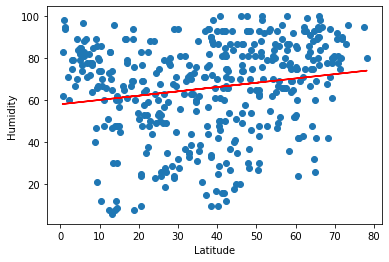

In [29]:
x = n_hem['Lat']
y = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12996971543671984


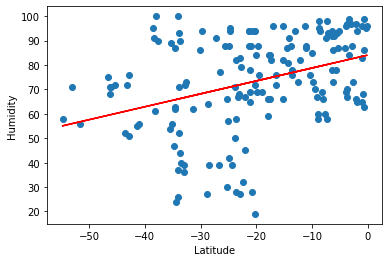

In [28]:
x = s_hem['Lat']
y = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006525650256350822


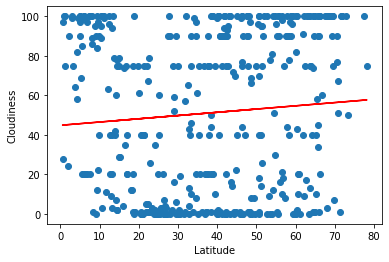

In [27]:
x = n_hem['Lat']
y = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11809961830975728


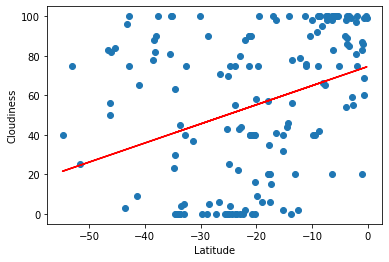

In [26]:
x = s_hem['Lat']
y = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028374674162709813


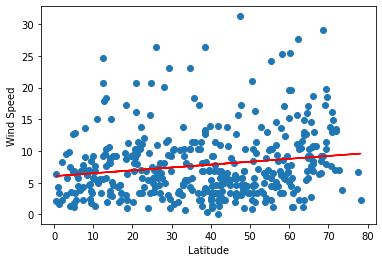

In [25]:
x = n_hem['Lat']
y = n_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07264610807838061


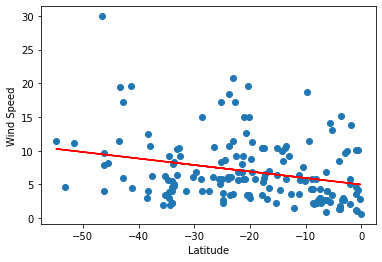

In [24]:
x = s_hem['Lat']
y = s_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

#no correlation